In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

data = pd.read_csv('MLDatasets/Social_Network_Ads.csv')
X = data.iloc[:, [2, 3]].values 
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

y_pred_nb = classifier_nb.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes:")
print(f"Confusion Matrix:\n{cm_nb}")
print(f"Accuracy: {accuracy_nb}")


classifier_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rf.fit(X_train, y_train)

y_pred_rf = classifier_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"Confusion Matrix:\n{cm_rf}")
print(f"Accuracy: {accuracy_rf}")

classifier_svm = SVC(kernel='rbf', random_state=0)  
classifier_svm.fit(X_train, y_train)

y_pred_svm = classifier_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("\nKernel SVM:")
print(f"Confusion Matrix:\n{cm_svm}")
print(f"Accuracy: {accuracy_svm}")

def plot_classifier(X, y, classifier, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color=ListedColormap(('red', 'green'))(i), label=j) 
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

plot_classifier(X_train, y_train, classifier_nb, 'Naive Bayes (Training set)')
plot_classifier(X_test, y_test, classifier_nb, 'Naive Bayes (Test set)')

plot_classifier(X_train, y_train, classifier_rf, 'Random Forest (Training set)')
plot_classifier(X_test, y_test, classifier_rf, 'Random Forest (Test set)')

plot_classifier(X_train, y_train, classifier_svm, 'Kernel SVM (Training set)')
plot_classifier(X_test, y_test, classifier_svm, 'Kernel SVM (Test set)')

ModuleNotFoundError: No module named 'pandas'

Naive Bayes:
Confusion Matrix:
[[65  3]
 [ 7 25]]
Accuracy: 0.9

Random Forest:
Confusion Matrix:
[[63  5]
 [ 4 28]]
Accuracy: 0.91



Kernel SVM:
Confusion Matrix:
[[64  4]
 [ 3 29]]
Accuracy: 0.93


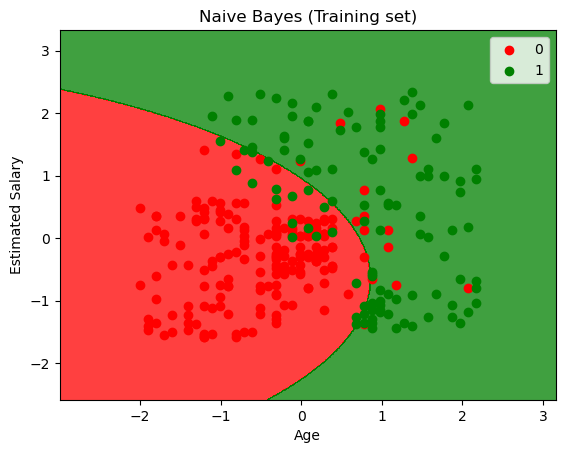

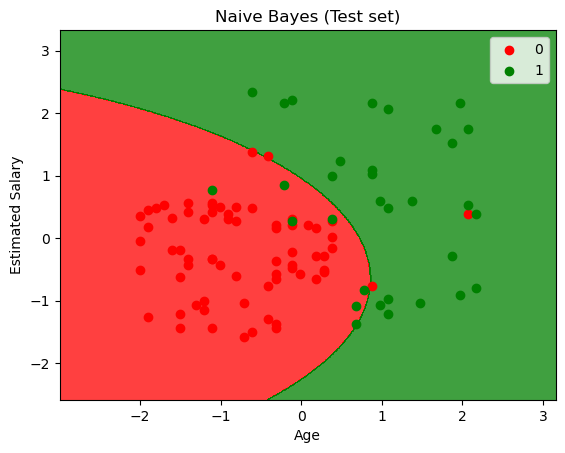

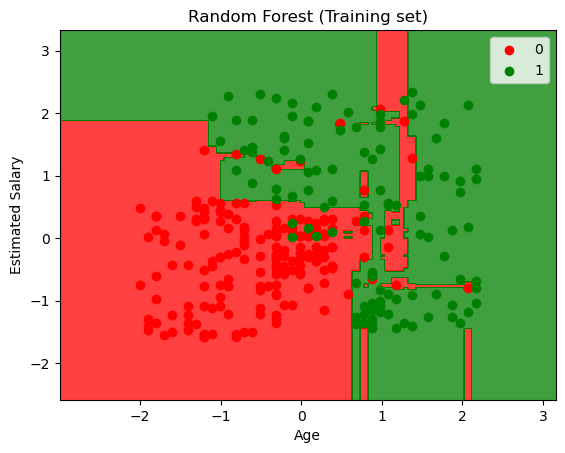

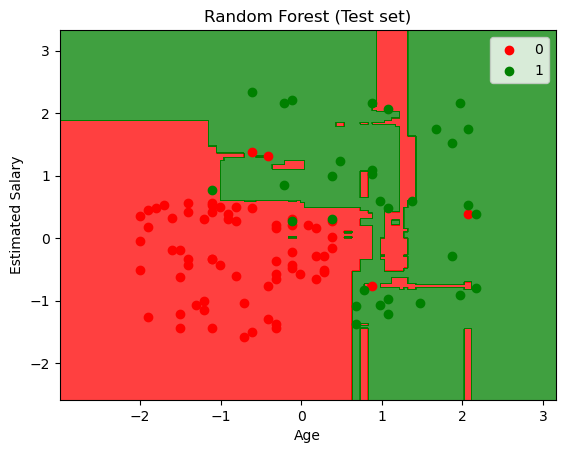

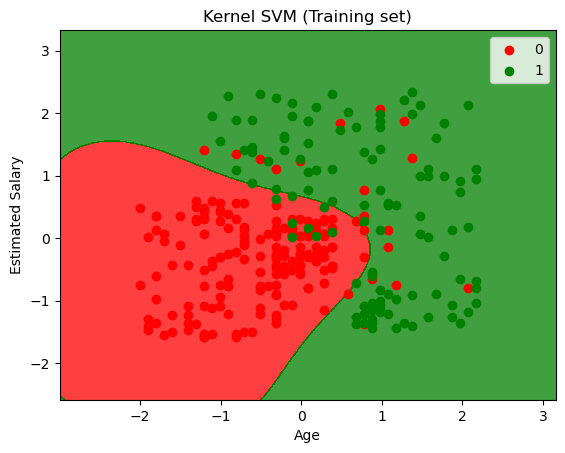

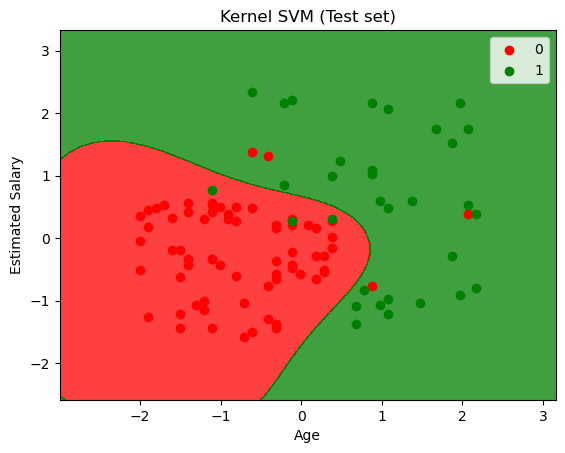